# Automatic Differentiation
This notebook closely follows the section: 
https://rsokl.github.io/CogWeb/Video/Automatic_Differentiation.html
Please refer to that section for additional information. 

## Automatic Differentiation at a Glance

Suppose that we have the function

\begin{equation}
f(x, y) = xy + x^2
\end{equation}

and that we want to evaluate the first-order partial derivatives of $f$ at $(x=2, y=4)$.
Let's evaluate these by hands so that we can know what to expect from our autodiff library.
The relevant partial derivatives of $f$ are

\begin{align}
\frac{\partial f}{\partial x} &= y + 2x\\
\frac{\partial f}{\partial y} &= x
\end{align}

Evaluated at $(x=2, y=4)$ gives:

\begin{align}
\frac{\partial f}{\partial x}\big|_{x=2, y=4} &= 4 + 2(2) = 8\\
\frac{\partial f}{\partial y}\big|_{x=2, y=4} &= 2
\end{align}

To compute these derivatives in MyGrad, we need only compute $f$ at the point(s) of interest; we can then instruct MyGrad to compute the derivatives of $f$.
In order for MyGrad to keep track of the mathematical operations that we are using, we must represent our variables of interest using `mygrad.Tensor` objects (more on these later).

In [3]:
# Defining x and y, and computing f(x, y)

import mygrad as mg
x = mg.tensor(2.0)
y = mg.tensor(4.0)
f = x * y + x ** 2  # computes f(2, 4)
f # stores f(2, 4) as a mygrad-tensor


Tensor(12.)

<!-- #endregion -->

The MyGrad-tensor `f` stores not only the value of $f(2, 4)$ but also the mathematical operations that were used to compute this value.
With this information, we can instruct MyGrad to compute the derivatives of $f$ with respect to each of its variables - evaluated at the variable's specific value.
We do this by calling the method `f.backward()` ("backward" is short for "backpropagation" which is the particular automatic differentiation algorithm that MyGrad employs).

<!-- #region -->

In [4]:
# Invoking autodiff, specifically backpropagation
#
# This says: "evaluate all of the derivatives of `f` with
# respect to all of the variables that `f` depends on"
#
f.backward()  # this method doesn't return any value

The derivatives are stored in each of the respective tensors, in the attribute `Tensor.grad`
<!-- #endregion -->

<!-- #region -->

In [5]:
# Accessing the derivatives of `f`, stored in the `Tensor.grad`
# attribute. These are always stored as NumPy arrays.
x.grad  # stores df/dx @ x=2, y=4


y.grad  # stores df/dy @ x=2, y=4


array(2.)

<!-- #endregion -->

Voilà! We have officially used automatic differentiation to evaluate the derivatives of a function.
Note that we didn't need to know any calculus or write down any derivatives to achieve this;
all we needed to do was use evaluate the function itself while using MyGrad's `Tensor` object to represent our variables.
From there, everything else was... _automatic_.

MyGrad is capable of handling much more complex and interesting functions than this;
it will behoove us to familiarize ourselves more thoroughly with this library.


Given the same two-variable function:

\begin{equation}
f(x, y) = xy + x^2
\end{equation}

Use MyGrad to compute $f(3.5, 10.1)$ along with the derivatives $\frac{\partial f}{\partial x}\big|_{x=3.5, y=10.1}$ and $\frac{\partial f}{\partial y}\big|_{x=3.5, y=10.1}$

In [6]:
# Defining x and y, and computing f(x, y)

# <COGINST>
import mygrad as mg

x = mg.tensor(3.5)
y = mg.tensor(10.1)

f = x * y + x ** 2  # computes f(3.5, 10.1)
f.backward()  # Triggers computations of derivatives

print(f, x.grad, y.grad)
# </COGINST>

Tensor(47.6) 17.1 3.5


## An Introduction to MyGrad

NumPy is the cornerstone for nearly all numerical and scientific computing software in Python, and thus it is desirable for us to spend our time focused on learning NumPy rather than splitting our attention across multiple array-math libraries.
For this reason, MyGrad was specifically designed to to act and feel just like NumPy.
Thus, if you want to get good at using MyGrad, you should spend most of your time [mastering NumPy!](https://www.pythonlikeyoumeanit.com/module_3.html).

The crux of MyGrad is the `Tensor` object.
This is analagous to NumPy's `ndarray`, as it: 

- can store [N-dimensional array data](https://www.pythonlikeyoumeanit.com/Module3_IntroducingNumpy/AccessingDataAlongMultipleDimensions.html), which can be [manipulated (e.g. reshaped, transposed, etc.)](https://mygrad.readthedocs.io/en/latest/tensor_manipulation.html)
- supports both [basic indexing](https://www.pythonlikeyoumeanit.com/Module3_IntroducingNumpy/BasicIndexing.html#Basic-Indexing) (accessing elements and subsections of tensor), [advanced indexing](https://www.pythonlikeyoumeanit.com/Module3_IntroducingNumpy/AdvancedIndexing.html) (accessing arbitrary collections of elements from the tensor)
- permits convenient [vectorized operations](https://www.pythonlikeyoumeanit.com/Module3_IntroducingNumpy/VectorizedOperations.html), which obey [NumPy's broadcasting semantics](https://www.pythonlikeyoumeanit.com/Module3_IntroducingNumpy/Broadcasting.html)
- mirrors NumPy's mechanism for providing [views of data](https://www.pythonlikeyoumeanit.com/Module3_IntroducingNumpy/BasicIndexing.html#Producing-a-View-of-an-Array) and [in-place updates on data](https://www.pythonlikeyoumeanit.com/Module3_IntroducingNumpy/BasicIndexing.html#Augmenting-the-Underlying-Data-of-an-Array)

What distinguishes the `Tensor` is that designed to support all of these features, _plus_ it enables automatic differentiation through any mathematical operations that involve tensors.

If you are already at least familiar with each of the above concepts, then you are already well-along your way to being a competent MyGrad user!
If these aren't ringing a bell, then it is strongly recommended that you review the [NumPy module from Python Like You Mean It](https://www.pythonlikeyoumeanit.com/module_3.html).

<!-- #region -->
### Creating and Using Tensors

A `Tensor` must be provided the array data that it is to store.
This can be a single number, a sequence of numbers, a NumPy array, or an existing tensor.

In [8]:
# Creating MyGrad Tensor instances
import mygrad as mg
import numpy as np

# Making a 0-D tensor from a float
mg.tensor(2.3)
#Tensor(2.3)

# Making a shape-(3,) tensor of 32-bit floats from a list
mg.tensor([1.0, 2.0, 3.0], dtype=np.float32)
#Tensor([1., 2., 3.], dtype=float32)

# Making a shape-(3, 3) tensor from a a numpy array
arr = np.ones((3, 3))
mg.tensor(arr)
#Tensor([[1., 1., 1.],
#        [1., 1., 1.],
#        [1., 1., 1.]])

# creating a shape-(9,) tensor and reshaping
# it into a shape-(3, 3) tensor
x = mg.arange(9.)
x
#Tensor([0., 1., 2., 3., 4., 5., 6., 7., 8.])

x.reshape(3, 3)
#Tensor([[0., 1., 2.],
#        [3., 4., 5.],
#        [6., 7., 8.]])

Tensor([[0., 1., 2.],
        [3., 4., 5.],
        [6., 7., 8.]])

<!-- #endregion -->

<!-- #region -->
Note that MyGrad uses NumPy's data-type system exactly so we can pass, e.g., `np.float32` anywhere there is a `dtype` argument in a MyGrad function to tell that function to return a tensor that stores 32-bit floats.

### Accessing the Underlying NumPy Array

Under the hood, every MyGrad tensor stores a NumPy array.
This can be accessed via the `.data` attribute or using `numpy.asarray`.

In [9]:
# Accessing a tensor's underlying numpy array
tensor = mg.tensor([1.2, 2.4])

tensor.data
#array([1.2, 2.4])

import numpy as np
np.asarray(tensor)
#array([1.2, 2.4])

array([1.2, 2.4])

#### Tensor-Creation Functions

MyGrad provides [a whole suite of tensor-creation functions](https://mygrad.readthedocs.io/en/latest/tensor_creation.html), which exactly mimic their NumPy counterparts.
These can be used to conveniently create tensors of specific shapes and with specific values as their elements. 
<!-- #endregion -->

<!-- #region -->

In [10]:
# Demonstrating some of MyGrad's tensor-creation functions

# Create a shape-(10,) tensor of subsequent integer-valued floats 0-9
mg.arange(10.)
#Tensor([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

# Create a shape-(2, 3, 4) tensor of 0s
mg.zeros((2, 3, 4))
#Tensor([[[0., 0., 0., 0.],
#         [0., 0., 0., 0.],
#         [0., 0., 0., 0.]],
# 
#        [[0., 0., 0., 0.],
#         [0., 0., 0., 0.],
#         [0., 0., 0., 0.]]], dtype=float32)

# Create a shape-(3, 4) tensor of numbers drawn randomly
# from the interval [0, 1)
mg.random.rand(3, 4)
#Tensor([[0.84171912, 0.48059864, 0.68269986, 0.72591644],
#        [0.2315483 , 0.04201723, 0.51519654, 0.2711251 ],
#        [0.76460016, 0.49148986, 0.2825281 , 0.38161674]])

Tensor([[5.47687386e-01, 6.23313988e-01, 5.31794213e-01, 4.94203464e-01],
        [2.41858413e-02, 6.08415547e-01, 9.00867097e-01, 4.94926932e-04],
        [1.94475577e-01, 9.38867822e-01, 7.73864515e-01, 1.22907614e-01]])

<!-- #endregion -->

**Reading Comprehension Question: Tensor-creation function**
Use `mg.linspace` and `mg.pi` to create a shape-(15,) tensor of 15 evenly-spaced elements over the interval $[0, \pi]$

In [11]:
# <COGINST>
mg.linspace(0, mg.pi, 15)
# </COGINST>

Tensor([0.        , 0.22439948, 0.44879895, 0.67319843, 0.8975979 ,
        1.12199738, 1.34639685, 1.57079633, 1.7951958 , 2.01959528,
        2.24399475, 2.46839423, 2.6927937 , 2.91719318, 3.14159265])

#### Standard Mathematical Operations

In terms of math, MyGrad provides all of the same standard [arithmetic, trigonometric, and exponential (etc.) functions](https://mygrad.readthedocs.io/en/latest/math.html) as does NumPy.
These are vectorized functions that obey NumPy's broadcasting semantics.
That is, unary functions naturally operate element-wise over tensors and binary functions naturally map between corresponding pairs of elements between two same-shape tensors.

<!-- #region -->

In [13]:
# Performing NumPy-like mathematical operation in MyGrad
x = mg.tensor([0.0, 0.25, 0.5, 0.75, 1.0])
y = mg.tensor([[0.],
                [1.],
                [2.]])

# computing sine on each element of `x`
mg.sin(x)
#Tensor([0.        , 0.24740396, 0.47942554, 0.68163876, 0.84147098])

# broadcast-multiply a shape-(5,) tensor with a shape-(3, 1) tensor
# producing a shape-(3, 5) tensor
x * y
#Tensor([[0.  , 0.  , 0.  , 0.  , 0.  ],
#        [0.  , 0.25, 0.5 , 0.75, 1.  ],
#        [0.  , 0.5 , 1.  , 1.5 , 2.  ]])

# summing the rows of `x * y`
mg.sum(x * y, axis=0)
#Tensor([0.  , 0.75, 1.5 , 2.25, 3.  ])

# Demonstrating matmul. Note that `x @ y` is equivalent to `mg.matmul(x, y)`

# Computing the dot-product between two 1D tensors
x = mg.tensor([1.0, 2.0])
y = mg.tensor([-3.0, -4.0])
mg.matmul(x, y)

#Tensor(-11.)


Tensor(-11.)

<!-- #endregion -->

<!-- #region -->
The distinguishing feature here is that all of these mathematical operations support automatic differentiation:

In [14]:
x = mg.tensor([0.0, 0.25, 0.5, 0.75, 1.0])
y = mg.tensor([[0.],
                [1.],
                [2.]])

# computing the derivatives of `mg.sum(x * y)`
f = mg.sum(x * y)
f.backward()  # compute derivatives of f w.r.t x and y
x.grad  # df/dx @ x=[0.0, 0.25, 0.5, 0.75, 1.0], y = [[0.],[1.],[2.]]
#array([3., 3., 3., 3., 3.])
y.grad
#array([[2.5],
#       [2.5],
#       [2.5]])

array([[2.5],
       [2.5],
       [2.5]])

<!-- #endregion -->

<!-- #region -->
## Running Automatic Differentiation

With a bit of know-how about MyGrad under our belts, let's mosey through a thorough discussion of automatic differentiation.

### MyGrad Bakes Autodiff Into Everything It Does
All of the examples of MyGrad's mathematical operations laid out above behave _identically_ to their NumPy counterparts in terms of the numerical results that they produce.
The difference is that MyGrad's functions were all designed to provide users with the ability to perform automatic differentiation through each of these operations.
We saw this in action at the beginning of this section, in ["Automatic Differentiation at a Glance"](#Automatic-Differentiation-at-a-Glance), but that was before we were familiar with MyGrad.

It is important to note that MyGrad's `Tensor` objects were written to "overload" the common arithmetic operators, such as `+` and `*`, so that you can use these familiar operators but actually invoke the corresponding MyGrad functions.
For example, calling:

In [ ]:
tensor_c = tensor_a + tensor_b

will _actually_ call

In [ ]:
tensor_c = mg.add(tensor_a, tensor_b)

So that we can perform automatic differentiation through this addition operation.
We can read about Python's [special methods](https://www.pythonlikeyoumeanit.com/Module4_OOP/Special_Methods.html) to better understand how one can design a class to "overload" operators in this way.

### MyGrad Adds "Drop-In" AutoDiff to NumPy

MyGrad's functions are intentionally designed to mirror NumPy's functions almost exactly.
In fact, for all of the NumPy functions that MyGrad mirrors, we can pass a tensor to a NumPy function and it will be "coerced" into returning a tensor instead of a NumPy array – thus we can autodifferentiate through NumPy functions!

In [15]:
# showing off "drop-in" autodiff through NumPy functions
import numpy as np
x = mg.tensor(3.)

y = np.square(x)  # note that we are using a numpy function here!
y  # y is a tensor, not a numpy array
#Tensor(9.)

y.backward()  # compute derivatives of y
x.grad  # stores dy/dx @ x=3
#array(6.)

array(6.)

<!-- #endregion -->

<!-- #region -->
How does this work?
MyGrad's tensor is able to tell NumPy's function to *actually* call a MyGrad function.

So

In [ ]:
np.square(mg.tensor(3.))

*actually* calls

In [ ]:
mg.square(mg.tensor(3.))

under the hood.
Not only is this convenient, but it also means that you can take a complex function that is written in terms of numpy functions and pass a tensor through it so that you can differentiate that function!

In [ ]:
from some_library import complicated_numpy_function
x = mg.tensor(...)
out_tensor = complicated_numpy_function(x)
out_tensor.backward() # compute d(complicated_numpy_function) / dx !

<!-- #endregion -->

<div class="alert alert-warning">

**Making it to the Big Leagues**:

During this course, we will have grown so comfortable with automatic differentiation and array mathematics that it will be easy for us to graduate to using "industrial-grade" libraries like PyTorch and TensorFlow, which are much more appropriate for doing high-performance work.
These libraries are far more sophisticated than is MyGrad (they have millions of dollars of funding and incredible expertise behind them!) and are able to leverage specialized computer hardware, like GPUs, to perform blazingly-fast computations.
In fact, we will turn to __PyTorch__ for some of our capstone project work.
</div>


<!-- #region -->
### The All-Important `.backward()` Method

The sole method that we need to use to invoke autodiff in MyGrad is `Tensor.backward()`.
Suppose that we have computed a tensor `ℒ` from other tensors; calling `ℒ.backward()` instructs MyGrad to compute the derivatives of `ℒ` with respect to all of the tensors that it depends on.
These derivatives are then stored as NumPy arrays in the `.grad` attribute in each of the respective tensors that preceded `ℒ` in its computation.

(Note that we are purposefully using the fancy unicode symbol `ℒ` (U+2112) to evoke an association with the "loss" function $\mathscr{L}$, whose gradient we will be interested in computing in machine learning problems.
That being said, this is purely an aesthetic choice made for this section; MyGrad does not care about the particular variable names that we use.)

Let's take an example

In [16]:
x = mg.tensor(2.0)
y = mg.tensor(3.0)
f = x * y  # actually calls: `mygrad.multiply(x, y)`
ℒ = f + x - 2  # actually calls `mygrad.subtract(mygrad.add(f, x), 2)`

See that $\mathscr{L}$ is a function of $f$, $x$, and $y$, and that
$f$ is a function of $x$ and $y$.
Thus the "terminal" (final) tensor in this "computational graph" that we have laid out can be thought of as the function $\mathscr{L}(f(x, y), x, y)$.

As described above, calling `ℒ.backward()` instructs MyGrad to compute all of the derivatives of `ℒ`. 
It does this using an algorithm known as "backpropagation", which we will discuss later.
Suffice it to say that MyGrad **simply uses the chain rule** ([reference](https://rsokl.github.io/CogWeb/Math_Materials/Chain_Rule.html)) to compute these derivatives.

In [17]:
ℒ.backward()  # triggers computation of derivatives of `ℒ`

f.grad  # stores dℒ/df = ∂ℒ/∂f @ x=2, y=2
#array(1.)

y.grad  # stores dℒ/dy = ∂ℒ/∂f ∂f/∂y @ x=2, y=2
#array(2.)

x.grad  # stores dℒ/dx = ∂ℒ/∂f ∂f/∂x + ∂ℒ/∂x @ x=2, y=2
#array(4.)

array(4.)

To re-emphasize the point made above: MyGrad was only able to access the necessary information to compute all of the derivatives of $\mathscr{L}$ (via the chain rule) because all of our quantities of interest were stored as MyGrad-tensors, and all of the mathematical operations that we performed on them were functions supplied by MyGrad.
<!-- #endregion -->

<!-- #region -->
Note that `x.grad` and `y.grad` together express the gradient of $\mathscr{L}$, $\vec{\nabla}\mathscr{L} = \begin{bmatrix} \frac{d \mathscr{L}}{d x} & \frac{d \mathscr{L}}{dy} \end{bmatrix}$, evaluated at $(x=2, y=3)$.
These derivatives are now available for use; e.g. we can use these derivatives to perform gradient descent on $\mathscr{L}$.

### Nulling Gradients 

Involving any of these tensors in further operations will automatically "null" its derivative (i.e. set it to `None`)

In [18]:
# Involving a tensor in a new operation will automatically set
# its `.grad` attribute to `None`
x.grad
#array(4.)

x + 2  # nulls the grad stored by `x`
#Tensor(4.0)

x.grad is None
#True

True

You can also explicitly call `Tensor.null_grad()` to set that tensor's `.grad` attribute back to `None`

In [19]:
# Demonstrating `Tensor.null_grad()`
y.grad
#array(2.)

y.null_grad()  # returns the tensor itself (for convenience)
#Tensor(3.)

y.grad is None
#True

True

It is important to understand how these gradients get cleared since we will need to make repeated use of a tensor and its associated derivative during gradient descent, and thus we will need to discard all of a tensor's associated derivative between iterations of gradient descent.
<!-- #endregion -->

**Reading Comprehension: Some Basic Autodiff Exercises**

Given $x = 2.5$, compute $\frac{d\mathscr{L}}{dx}\big|_{x=2.5}$ for the following $\mathscr{L}(x)$
    
1. $\mathscr{L}(x) = 2 + 3x - 5x^2$
2. $\mathscr{L}(x) = \cos{(\sqrt{x})}$
3. Given $f(x) = x^2$, $\mathscr{L}(x) = (2 x f(x))^2 - f(x)$  ...define `f` as a separate tensor before computing `ℒ`.

In [20]:
# <COGINST>
import mygrad as mg

x = mg.tensor(2.5)

# 1. ℒ(x) = 2 + 3x - 5x**2
L = 2 + 3 * x - 5 * x ** 2
L.backward()
x.grad  # dℒ/dx @ x=2.5 -> array(-22.)

# </COGINST>

array(-22.)

In [21]:
# <COGINST>
# 2. ℒ(x) = cos(sqrt(x))
L = mg.cos(mg.sqrt(x))
L.backward()
x.grad  # dℒ/dx @ x=2.5 -> array(-0.31621085)
# </COGINST>

array(-0.31621085)

In [22]:
# <COGINST>
# 3. f(x) = x**2, and ℒ(x) = (2x f(x))**2 - f(x)
f = x ** 2
L = (2 * x * f) ** 2 - f
L.backward()
x.grad  # dℒ/dx @ x=2.5 -> array(2338.75)
# </COGINST>

array(2338.75)

Given $x = 2.5$, verify that the following pairs of functions yield the same derivatives in MyGrad.
    
1. $\mathscr{L}(x) = xx$ and $\mathscr{L}(x) = x^2$
2. $\mathscr{L}(x) = e^{\ln x}$ and $\mathscr{L}(x) = x$

In [23]:
# <COGINST>
x = mg.Tensor(2.5)

# 1. ℒ(x) = x*x vs ℒ(x) = x ** 2
(x * x).backward()
x.grad  # -> array(5.)

(x ** 2).backward()
x.grad # -> array(5.)
# </COGINST>

array(5.)

In [24]:
# <COGINST>
# 2. ℒ(x) = exp(ln(x)) vs ℒ(x) = x
mg.exp(mg.log(x)).backward()
x.grad  # -> array(1.)

x.backward()
x.grad  # -> array(1.)
# </COGINST>

array(1.)

<!-- #region -->
### Constant Tensors and Mixed Operations with NumPy Arrays

An important feature of MyGrad is that you can do mixed operations between its tensors and other array-like objects or numbers.
Not only is this convenient, but it also enables us to designate certain quantities in our computations as **constants**, i.e. as quantities for which we **do not need to compute derivatives**.
For example, in the following calculation MyGrad only computes one derivative, $\frac{d\mathscr{L}}{dx}$, of a binary function;
this enables us to avoid unnecessary computation if we don't have any use for $\frac{d\mathscr{L}}{dy}$.

In [25]:
# Demonstrating mixed operations between tensors
# and non-tensors
import numpy as np
x = mg.tensor([1., 2.])
y = np.array([3., 4.])  # this array acts like "a constant"
ℒ = x * y
ℒ.backward()  # only dℒ/dx is computed
x.grad  # stores dℒ/dx is computed
#array([3., 4.])

array([3., 4.])

<!-- #endregion -->

<!-- #region -->
All of MyGrad's functions also accept a "constant" argument, which, when specified as `True`, will cause the creation of a **constant tensor**.
Just like when it encounters a NumPy array or Python number, MyGrad knows to skip the calculation of a derivative with respect to a constant tensor.
We can check the `Tensor.constant` attribute to see if a tensor is a constant or not.

In [26]:
# Demonstrating the use of a constant Tensor
import numpy as np
x = mg.tensor([1., 2.])
y = mg.tensor([3., 4.], constant=True)

x.constant
#False
y.constant
#True

ℒ = x * y
ℒ.backward()  # only dℒ/dx is computed
x.grad
#array([3., 4.])
y.grad is None
#True

True

<!-- #endregion -->

<!-- #region -->
All integer-dtype tensors are treated as constants:

In [27]:
tensor_of_ints = mg.tensor([1, 2, 3])
tensor_of_ints.constant
#True

True

<!-- #endregion -->

Operations only involving constants and constant tensors will naturally create constant tensors.

<!-- #region -->

In [28]:
# Operations involving only constants will produce a constant
out = mg.tensor([1.0, 2.0], constant=True) + mg.tensor([3.0, 4.0], constant=True)
out.constant
#True

True

<!-- #endregion -->

<!-- #region -->
And calling `.backward()` on a constant tensor will not do anything at all!

In [29]:
# calling `.backward()` on a constant has no effect
out.backward()
out.grad is None

True

<!-- #endregion -->

It is useful to keep the intimate relationship between a MyGrad tensor and an underlying NumPy array in mind because it reminds us of how similar these libraries are, and it informs our intuition for how tensors behave.
Furthermore, this will prove to be an important technical detail for when we perform gradient descent, where we will want to update directly the data being held by the tensor. 

<!-- #region -->
## Gradient Descent with MyGrad

Without further ado, let's leverage automatic differentiation to perform gradient descent on a simple function.
To stick with a familiar territory, we will once again perform gradient descent on the simple function $\mathscr{L}(w) = w^2$.
By making sure that we store the value representing $w$ as a MyGrad tensor, and use it to calculate $L(w)$, we will be able to leverage autodiff.

Recall that we will be updating $w$ according to the gradient-based step

\begin{equation}
w_{\mathrm{new}} = w_{\mathrm{old}} - \delta \frac{\mathrm{d}\mathscr{L}}{\mathrm{d}w}\big|_{w_{\mathrm{old}}}
\end{equation}

Picking $w = 10$ as a starting point, using the learning rate $\delta=0.3$, and taking ten steps, let's search for the minimum of $L$.
One thing to note here is that we will update the NumPy array underlying the tensor `w` directly for the gradient-based update.

In [30]:
# Performing gradient descent on ℒ(w) = w ** 2
w = mg.tensor(10.0)
learning_rate = 0.3
num_steps = 10
print(w)

for _ in range(num_steps):
    ℒ = w ** 2    # compute L(w)
    ℒ.backward()  # compute derivative of L
    
    # w_new = w_old - lr * dℒ/dw
    w.data -= learning_rate * w.grad  # update w via gradient-step
    print(w)


Tensor(10.)
Tensor(4.)
Tensor(1.6)
Tensor(0.64)
Tensor(0.256)
Tensor(0.1024)
Tensor(0.04096)
Tensor(0.016384)
Tensor(0.0065536)
Tensor(0.00262144)
Tensor(0.00104858)


See that the gradient descent algorithm is steadily guiding use towards the global minimum $w = 0$, and we didn't even need to do any calculus on our own!

The line of code that we wrote to represent the gradient-step,

In [ ]:
w.data -= learning_rate * w.grad

might be a little more nuanced than one might have expected.
We could have instead written

In [ ]:
w = w - learning_rate * w.grad

which more closely aligns with the mathematical equation written above.
That being said, the former equation has two benefits, both in terms of optimizing computational speed and both deriving from the fact that we are operating directly on the NumPy array stored by `w` via `w.data`:

1. The form `w.data -= learning_rate * w.grad` involves only NumPy arrays, thus we do not need to pay the extra computational overhead incurred by MyGrad's tracking of mathematical operations.
2. Using the operator `-=` invokes an [augmented update](https://www.pythonlikeyoumeanit.com/Module3_IntroducingNumpy/BasicIndexing.html#Augmented-Assignments) on the data held by `w`, this means that the computer can directly overwrite the memory associated with `w.data` instead of allocating a new array and then replacing `w.data` with it.

Neither of these points really matter for this extremely lightweight example, but they will make more of a difference when we are making many updates to numerous, large arrays of data, which will be the case when we are tuning the parameters of a neural network.
Towards that end, be sure to carefully complete the following exercise...
<!-- #endregion -->


**Reading Comprehension: Writing a Generic Gradient-Update Function**:

Complete the following Python function, which is responsible for taking an arbitrary collection (e.g. a list) of MyGrad tensors, **which are assumed to already store their relevant gradients**, and perform a gradient-step on each one of them.
That is, assume that, outside of this function, `ℒ` has already been computed and `ℒ.backward()` was already invoked so that now all that is left to be done is perform the gradient-based step on each tensor.
    
This function will be a very useful utility for when you are optimizing a function involving multiple different variables.
    
(Hint: this should be a very brief function... much shorter than its docstring)

In [31]:
def gradient_step(tensors, learning_rate):
    """
    Performs gradient-step in-place on each of the provides tensors 
    according to the standard formulation of gradient descent.

    Parameters
    ----------
    tensors : Union[Tensor, Iterable[Tensor]]
        A single tensor, or an iterable (e.g a list) of an arbitrary number of tensors.

        If a `tensor.grad` is `None`for a specific tensor, the update on
        that tensor is skipped.

    learning_rate : float
        The "learning rate" factor for each descent step. A positive number.

    Notes
    -----
    The gradient-steps performed by this function occur in-place on each tensor,
    thus this function does not return anything
    """
    # If `tensors` is a single Tensor, make it into a list containing that tensor
    # <COGINST>
    if isinstance(tensors, mg.Tensor):
        # Only one tensor was provided. Pack
        # it into a list so it can be accessed via
        # iteration
        tensors = [tensors]
    # </COGINST>
    # Iterate over `tensors` using a for-loop.
    #
    # Update each tensor's underlying data using the gradient-step.
    # If the tensor's gradient is not set (i.e. it is `None`), skip the tensor
    # <COGINST>
    for t in tensors:
        if t.grad is not None:
            t.data -= learning_rate * t.grad
    # </COGINST>

Copy the gradient-descent code block from above, involving $\mathscr{L}(w) = w^2$.
Update it to use your `gradient_step` function.
Run the code and check that it prints the expected steps.

In [32]:
# <COGINST>
# Performing gradient descent on ℒ(w) = w ** 2
w = mg.tensor(10.0)
learning_rate = 0.3
num_steps = 10
print(w)

for step_cnt in range(num_steps):
    ℒ = w ** 2    # compute ℒ(w)
    ℒ.backward()  # compute derivative of ℒ
    gradient_step(w, learning_rate)
    print(w)
# </COGINST>

Tensor(10.)
Tensor(4.)
Tensor(1.6)
Tensor(0.64)
Tensor(0.256)
Tensor(0.1024)
Tensor(0.04096)
Tensor(0.016384)
Tensor(0.0065536)
Tensor(0.00262144)
Tensor(0.00104858)


## Tensors as Collections of Scalar Variables

Thus far we have focused on equations involving scalars, like `Tensor(2.0)`, which are zero-dimensional tensors.
This was done intentionally, since we are most comfortable with thinking of equations that only involve scalars, such as $f(x) = x^2$; we intuitively know that $x$ represents a single number here.
That being said, the `Tensor` object was clearly designed to be able to represent an $N$-dimensional array of data.
How, then, are we to interpret the `.grad` attribute associated with a multidimensional tensor?
The answer, generally, is that **each element of a tensor is to be interpreted as a scalar-valued variable**.

Consider, for example, the following calculation

<!-- #region -->

In [33]:
tensor = mg.tensor([2.0, 4.0, 8.0])
arr = np.array([-1.0, 2.0, 0])
# sum(-1 * x0**2 + 2 * x1**2 + 0 * x2**2)
ℒ = (arr * tensor ** 2).sum()
ℒ.backward()

<!-- #endregion -->

What value(s) should we expect to be stored in `tensor.grad`?
Take some time to think about this and see if you can convince yourself of an answer.

Let's work out what we should expect the gradient to be given the aforementioned prescription: that each element of `tensor` should be treated like a distinct scalar-valued variable.
I.e. we'll say $\mathrm{tensor} = [x_0, x_1, x_2]$, then the equation for $\mathscr{L}$ is


\begin{equation}
\mathscr{L} = -1\:(x_0)^2 + 2\:(x_1)^2 + 0\:(x_2)^2
\end{equation}


And `tensor.grad` will store $\vec{\nabla}\mathscr{L}$ evaluated at the particular value stored by `tensor`

<!-- #region -->
\begin{align}
\vec{\nabla}\mathscr{L} &= \big[\frac{\mathrm{d}\mathscr{L}}{\mathrm{d}x_0},\frac{\mathrm{d}\mathscr{L}}{\mathrm{d}x_1},\frac{\mathrm{d}\mathscr{L}}{\mathrm{d}x_2}\big]\\
&= \big[-2x_0,\:4x_1,\:0x_0\big]\\
\vec{\nabla}\mathscr{L}\big|_{x_0=2, x_1=4, x_2=8} &= \big[-4,\:16,\:0\big]
\end{align}

Indeed this is what we find

In [34]:
tensor.grad
#array([-4., 16.,  0.])

array([-4., 16.,  0.])

<!-- #endregion -->

Thus the `.grad` array has a clear correspondence with its associated tensor: if `tensor` is a N-dimensional tensor that is involved in **the calculation of a scalar** $\mathscr{L}$ (and assuming that we invoked `ℒ.backward()`), then `t.grad` is an array **of the same shape as** `tensor` that stores the corresponding derivatives of $\mathscr{L}$.

That is, given that we think of a single element of a tensor to be a scalar-valued variable


\begin{equation}
\text{tensor}[i_1, \dots, i_N] \rightarrow x_{i_1, \dots, i_N}
\end{equation}

then the corresponding element of the associated gradient is the derivative involving that variable 

\begin{equation}
\text{tensor.grad}[i_1, \dots, i_N] \rightarrow \frac{\mathrm{d}\mathscr{L}}{\mathrm{d} x_{i_1, \dots, i_N}}\\
\end{equation}


**Reading Comprehension: Descent Down a Parabolic Surface using MyGrad**:

Using automatic differentiation with MyGrad, complete the following Python function that implements gradient descent on the skewed paraboloid $\mathscr{L}(w_1, w_2) = 2 w_1^2 + 3 w_2^2$.

Note that you should not need to derive/compute the partial derivatives of $\mathscr{L}$ yourself; we will be using MyGrad to compute the derivatives for us.
    
Your calculation of $\mathscr{L}(w_1, w_2) = 2 w_1^2 + 3 w_2^2$ should be fully vectorized; i.e. you should use a shape-(2,) tensor `w` to store $[w_1, w_2]$, and perform element-wise operations on it in order to compute $\mathscr{L}$.
Think about what array you can use do element-wise multiplication, but where you are performing `(2*, 3*)`.

This code should look very similar to the code that was used to perform gradient descent down $\mathscr{L}(w) = w^2$.

Use your `gradient_step` function to make updates to `w`.
    
Test your function using the inputs `w_start=mg.tensor([2.0, 4.0])`, `learning_rate=0.1`, and `num_steps=10`.

In [35]:
import numpy as np

def descent_down_2d_parabola(w_start, learning_rate, num_steps):
    """
    Performs gradient descent on ℒ(w1, w2) = 2 * w1 ** 2 + 3 * w2 **2 , 
    returning the sequence of w-values: [w_start, ..., w_stop]

    Parameters
    ----------
    w_start : mygrad.Tensor, shape-(2,)
        The initial value of (w1, w2).

    learning_rate : float
        The "learning rate" factor for each descent step. A positive number.

    num_steps : int
        The number subsequent of descent steps taken. A non-negative number.

    Returns
    -------
    Tensor, shape-(2,)
        The final updated values of (w_1, w_2) 
    """
    # <COGINST>
    # We don't want to mutate our input tensor,
    # so we make a copy
    w = mg.tensor(w_start) 
    
    const = np.array([2.0, 3.0])
    
    for _ in range(num_steps):
        ℒ = const * w ** 2
        ℒ.backward()
        # updates `w` in-place
        gradient_step(w, learning_rate=learning_rate)
    return w
    # </COGINST>


descent_down_2d_parabola(w_start=mg.tensor([2.0, 4.0]), learning_rate=0.1, num_steps=10)

Tensor([0.01209324, 0.00041943])

Lastly, here is a nice function that we can use to plot a function and its derivative.
You need not make any modifications to the code.
Simply run the cell.

In [36]:
import matplotlib.pyplot as plt
%matplotlib notebook

def plot_func_and_deriv(x, func):
    """ Plots func(x) and dfunc/dx on the same set of axes at the user-specified point
    stored in ``x``.

    Parameters
    ----------
    x : mygrad.Tensor, shape-(N,)
        The positions at which `func` and its derivative will be
        evaluated and plotted.

    func: Callable[[Tensor], Tensor]
        A unary function that is assumed to support backpropagation via MyGrad.
        I.e. calling `func(x).backward()` will compute the derivative(s) of `func`
        with respect to `x`.

    Returns
    -------
    Tuple[Figure, Axis]
        The figure and axis objects associated with the plot that was produced.
    """
    fig, ax = plt.subplots()

    x = mg.tensor(x)
    y = func(x)  # evaluate function
    y.backward() # compute df/dx

    # We need to pass arrays to matplotlib's functions, not
    # tensors
    ax.plot(x.data, y.data, label="f(x)")
    ax.plot(x.data, x.grad, ls="--", label="df/dx")
    ax.grid(True)
    ax.legend()
    ax.set_xlabel("x")
    return fig, ax

Let's see this function in action!
Note that `f` is written using NumPy functions but thanks to MyGrad's "drop-in" autodiff design we can still differentiate it as long as we pass a tensor to `f`!

<IPython.core.display.Javascript object>


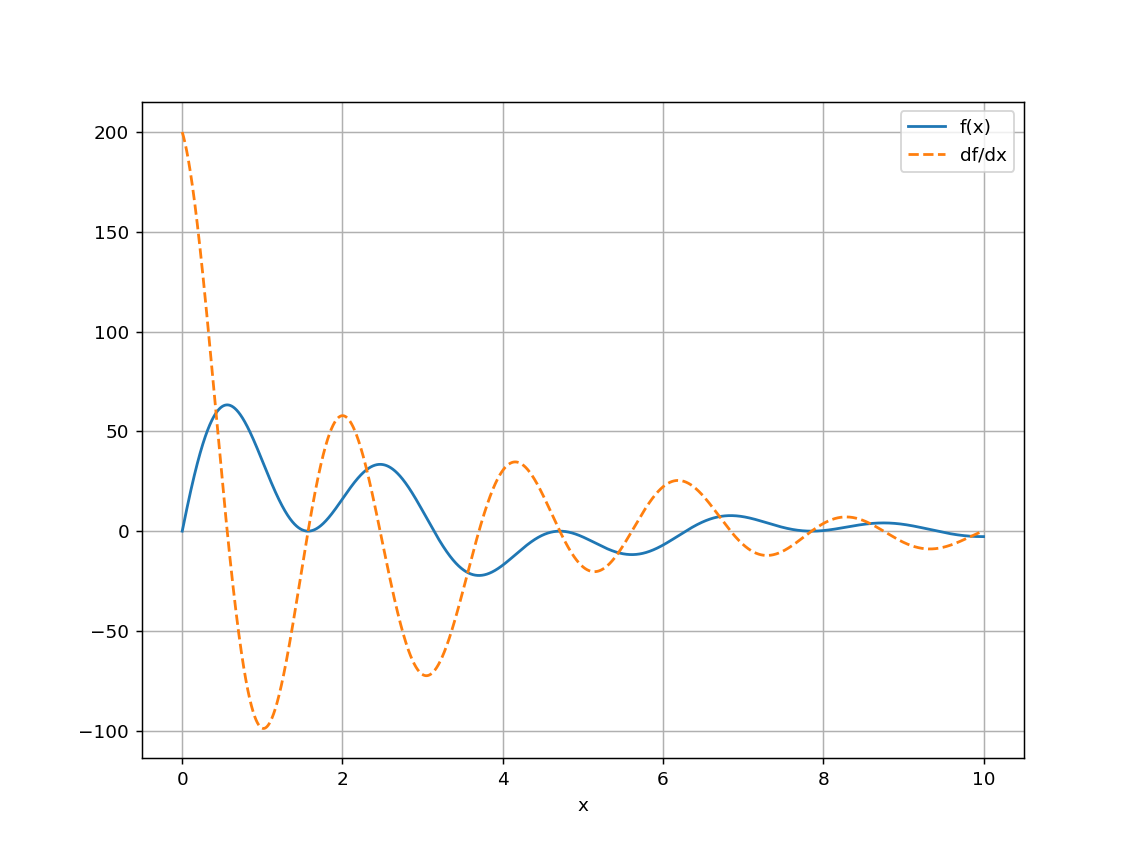

In [37]:
import numpy as np

def f(x):
    return np.sin(2 * x) * np.cos(x) * np.exp(-x / 3) * 100

x = mg.linspace(0, 10, 10000)
fig, ax = plot_func_and_deriv(x, f)